**Unicode**

Now we consider a file with _very_ special characters. 

Have a look at the file "special.txt"

We can open it in jupyter lab.

Below is what the file looks like in the free hex editor *HxD* 

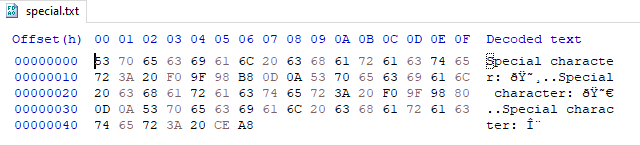

**Read as a string**

Here is what happens when we read the file into a text string.

In [ ]:
fin=open("special.txt","r")
text=fin.read()
fin.close()
print(text)

**Another example**

The file special2.txt also contains special characters.

In [ ]:
fin=open("special2.txt","r")
text=fin.read()
fin.close()
print(text)

**Identify the non-ASCII bytes**

We can read in the file special.txt and special2.txt and store the bytes. And determine which bytes represent ascii characters.

In [1]:
fin=open("special.txt","rb")
b=fin.read()
print(type(b))
print(len(b))
fin.close()
for i in range(len(b)):
    if b[i]<128:
        pass
    else: 
        st="byte in position {:5d} value is {:3d}".format(i,b[i])
        print(st)

<class 'bytes'>
71
byte in position    19 value is 240
byte in position    20 value is 159
byte in position    21 value is 152
byte in position    22 value is 184
byte in position    44 value is 240
byte in position    45 value is 159
byte in position    46 value is 152
byte in position    47 value is 128
byte in position    69 value is 206
byte in position    70 value is 168


In [ ]:
fin=open("special2.txt","rb")
b=fin.read()
fin.close()
for i in range(len(b)):
    if b[i]<128:
        pass
    else: 
        st="byte in position {:5d} value is {:3d}".format(i,b[i])
        print(st)

**Unicode characters**

The first file looks like a text file and the second does not (jupyter won't even load it!!!).

So an issue here is that the one that looks like a text file contains special _unicode_ characters. 

The Python interpreter doesn't know that we included these in our file until we alert it to this fact. 

Instead, the interpreter tries to read the file into the string as a collection of 8 bit characters


The file "special.txt" contains bytes that represent _unicode_ characters, using a particular coding referred to as _utf-8_ (More about how this encoding works below.)

If we want to read these bytes into a string and have that string represent the characters, we read the file in as a binary file and then decode the string.

When we read the file in as a binary file, we obtain a _bytes_ object.

In [2]:
fin=open("special.txt","rb")
btext=fin.read()
print(len(btext))
fin.close()
print(btext)
print(type(btext))

71
b'Special character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'
<class 'bytes'>


**Decoding**

When we print a bytes object to the screen, the ascii characters are shown in their usual representation, while the bytes represeneting non-ascii characters are show as \xhh where hh consists of two hexadecimal characters.

This can be then *decoded* to produce a text string with <u> unicode </u> characters.

In [3]:
fin=open("special.txt","rb")
btext=fin.read() # read every byte into btext
print(btext)
fin.close()
print(len(btext))

text=btext.decode()
print(text)
print(type(text))
print(len(text))

b'Special character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'
71
Special character: 😸
Special character: 😀
Special character: Ψ
<class 'str'>
64


**Single characters in a string**

So we see that Python <u> strings </u> can contain these special unicode characters. A string containing a unicode character has length 1, despite the fact that its binary representation can consist of more than 2 bytes.

In [4]:
funnyface=btext[19:23].decode()
print(funnyface)
print(len(funnyface))
print(type(funnyface))

😸
1
<class 'str'>


In [5]:
print(text[19])
print(len(text[19]))

😸
1


In [8]:
text

'Special character: 😸\r\nSpecial character: 😀\r\nSpecial character: Ψ'

**Writing to a file**
If we try to write our string out to a file we get an error.

In [7]:
fout=open("try.txt","w")
fout.write(text)
fout.close()

UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f638' in position 19: character maps to <undefined>

**Encoding**

Going in the other direction, if we have a string with unicode characters in it, then to print it out, we need to encode it as a bytes object, and write it as a binary file.

In [9]:
fout=open("try.txt","wb")
bt=text.encode()
print(type(bt))
fout.write(bt)
fout.close()

<class 'bytes'>


In [10]:
btext2=text.encode()
fout=open("output4.txt","wb")
fout.write(btext2)
fout.close()


**How utf-8 encoding works**


The encoding method is described enthusiastically in a fun video here recorded in a hotel lobby by Tom Scott 

https://en.wikipedia.org/wiki/Tom_Scott_(presenter)

Here's a link to the video in YouTube:

https://www.youtube.com/watch?v=MijmeoH9LT4

The basic idea is explained in the following image from the Wikipedia utf-8 page.

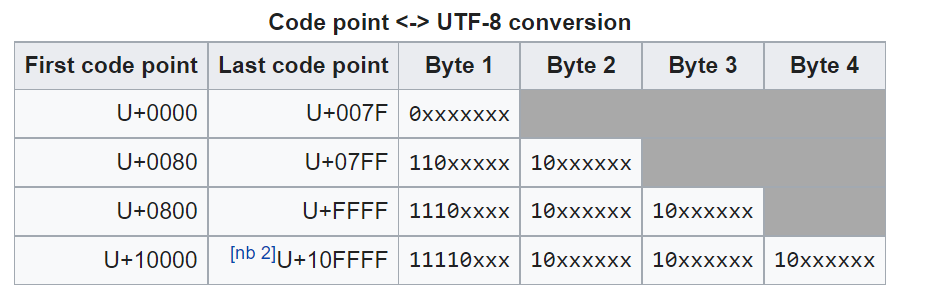

- When a byte appears in the stream whose first bit is 0, this indicates that the next 7 bits give code (0-127) of an ascii character.

- When a byte starts with 110xxxxx, this indicates that the next byte will be of the form 10xxxxxx, and the 11 avilaiable bits can be used to encode a character.

- When a byte starts with 1110xxxx, this indicates that the next two bytes will be of the form 10xxxxxx, and the 16 avilaiable bits can be used to encode a character.

- When a byte starts with 11110xxx, this indicates that the next three bytes will be of the form 10xxxxxx, and the 21 avilaiable bits can be used to encode a character.

As a result, we are able to encode 2,164,864 possible characters.

In [ ]:
n=2**21 + 2**16 + 2**11 + 2**7
print("{:,}".format(n))

**Example**
Consider the special 3 characters mentioned above 

😸😀Ψ

We look at the binary representations of their bytes.

In [8]:
b0=b'\xf0\x9f\x98\xb8'
b1=b'\xf0\x9f\x98\x80'
b2=b'\xce\xa8'

In [9]:
c0=b0.decode()
print(c0)
print(bin(0xf0))
print(bin(0x9f))
print(bin(0x98))
print(bin(0xb8))

😸
0b11110000
0b10011111
0b10011000
0b10111000


In [10]:
c1=b1.decode()
print(c1)
print(bin(0xf0))
print(bin(0x9f))
print(bin(0x98))
print(bin(0x80))

😀
0b11110000
0b10011111
0b10011000
0b10000000


In [11]:
c2=b2.decode()
print(c2)
print(bin(0xce))
print(bin(0xa8))

Ψ
0b11001110
0b10101000


**Code points**

Every Unicode character has a code point, which we can look up in standard unicode tables.

The function ord() gives us the code point of a character in decimal.

In [12]:
print(ord(c0))
print(ord(c1))
print(ord(c2))
print(hex(ord(c0)))
print(hex(ord(c1)))
print(hex(ord(c2)))

128568
128512
936
0x1f638
0x1f600
0x3a8


Once we have a code point for a character we can go in the other direction and get the character.

In [13]:
print(chr(128568))
print(chr(128512))
print(chr(936))
print(0x1f638)
print(0x1f600)
print(0x3a8)


😸
😀
Ψ
128568
128512
936


**Online character tables**

We can go to our online character table and find the code point for some character. 

https://www.unicode.org/charts/PDF/U1F600.pdf


In [14]:
print(chr(0x1f624))

😤


**Mal-formed encodings**

It is possible to have a binary file with mal-formed utf-8 encoding.

For example, consider the second file special2.txt.

In [13]:
fin=open("special2.txt","rb")
b=fin.read()
fin.close()
text=b.decode()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 0: invalid start byte

In [20]:
for i in range(len(b)):
    print(hex(b[i])+" "+bin(b[i]))

0x81 0b10000001
0x83 0b10000011
0x98 0b10011000
0xb8 0b10111000
0xd 0b1101
0xa 0b1010
0x20 0b100000
0xf0 0b11110000
0x9f 0b10011111
0x98 0b10011000
0x80 0b10000000
0xd 0b1101
0xa 0b1010
0x3a 0b111010
0x20 0b100000
0xce 0b11001110
0xa8 0b10101000


The file contains the two bytes: \x81\x83 which are continuation bytes but there is no inititation byte.

In [16]:
print(bin(0x81))
print(bin(0x82))

0b10000001
0b10000010
